## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Python36\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25,0.35,0.45]

In [9]:
results = {}
for drop_rate in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop_rate)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-drop-%s" % str(drop_rate)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0802 08:53:17.123000  8384 deprecation_wrapper.py:119] From C:\Python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 08:53:17.145995  8384 deprecation_wrapper.py:119] From C:\Python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 08:53:17.147994  8384 deprecation_wrapper.py:119] From C:\Python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 08:53:17.171990  8384 deprecation_wrapper.py:119] From C:\Python36\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0802 08:53:17.186987  8384 deprecation.py:506] From C:\Python36\lib\site-packages\keras\backend\t

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

Epoch 48/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.3834 - acc: 0.5062 - val_loss: 1.3603 - val_acc: 0.5113
Epoch 49/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.3763 - acc: 0.5091 - val_loss: 1.3502 - val_acc: 0.5130
Epoch 50/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.3780 - acc: 0.5080 - val_loss: 1.3522 - val_acc: 0.5167
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               

Epoch 41/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.7117 - acc: 0.3717 - val_loss: 1.5943 - val_acc: 0.4303
Epoch 42/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.7141 - acc: 0.3711 - val_loss: 1.5769 - val_acc: 0.4344
Epoch 43/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.7065 - acc: 0.3758 - val_loss: 1.5827 - val_acc: 0.4370
Epoch 44/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.6983 - acc: 0.3787 - val_loss: 1.5672 - val_acc: 0.4399
Epoch 45/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.6928 - acc: 0.3848 - val_loss: 1.5764 - val_acc: 0.4347
Epoch 46/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.6960 - acc: 0.3823 - val_loss: 1.5579 - val_acc: 0.4409
Epoch 47/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6874 - acc: 0.3847 - val_loss: 1.5573 - val_acc: 0.4446
Epoch 48/50
50000/50000 [==

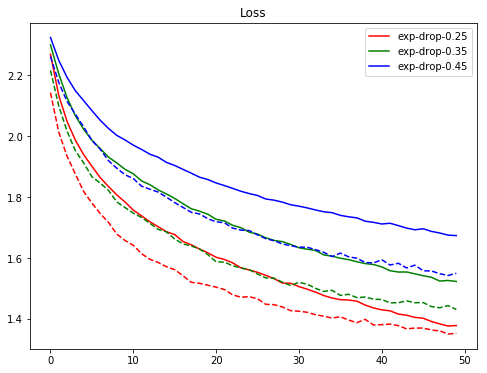

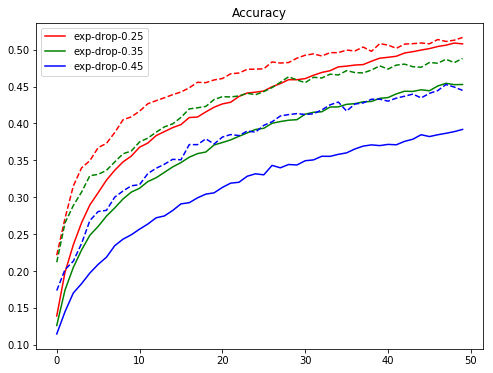

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [13]:
results_adam = {}
for drop_rate in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop_rate)
    model.summary()
    optimizer = keras.optimizers. Adam(lr=LEARNING_RATE, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-drop-%s" % str(drop_rate)
    results_adam[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
__________

50000/50000 [==============================] - 15s 293us/step - loss: 1.8476 - acc: 0.3174 - val_loss: 1.8236 - val_acc: 0.3450
Epoch 44/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.8517 - acc: 0.3147 - val_loss: 1.8342 - val_acc: 0.3431
Epoch 45/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.8496 - acc: 0.3157 - val_loss: 1.8546 - val_acc: 0.3360
Epoch 46/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.8470 - acc: 0.3179 - val_loss: 1.8185 - val_acc: 0.3366
Epoch 47/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.8474 - acc: 0.3192 - val_loss: 1.7971 - val_acc: 0.3500
Epoch 48/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.8500 - acc: 0.3174 - val_loss: 1.8926 - val_acc: 0.3171
Epoch 49/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.8465 - acc: 0.3193 - val_loss: 1.8150 - val_acc: 0.3560
Epoch 50/50
50000/50000 [=======

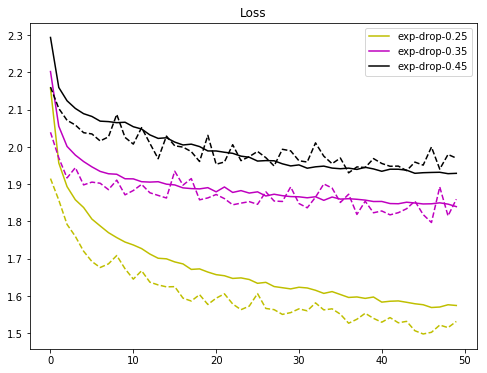

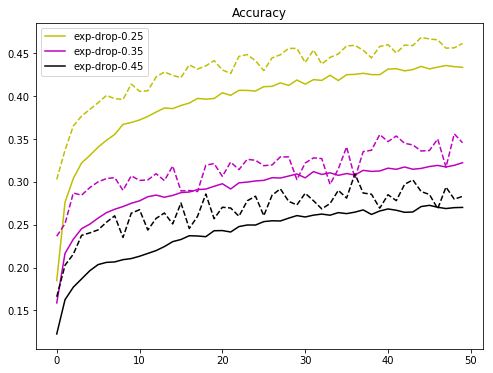

In [15]:
color_bar = ["y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_adam.keys()):
    plt.plot(range(len(results_adam[cond]['train-loss'])),results_adam[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_adam[cond]['valid-loss'])),results_adam[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_adam.keys()):
    plt.plot(range(len(results_adam[cond]['train-acc'])),results_adam[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_adam[cond]['valid-acc'])),results_adam[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()